In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, dot, e
from numpy.random import rand
from random import shuffle

from sklearn.model_selection import train_test_split

In [ ]:
a,b = -1,2
x = np.arange(1,30)
y = a*x + b + np.random.normal(0, 1 , len(x))

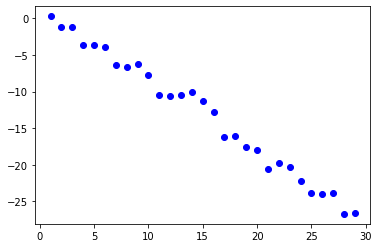

In [ ]:
plt.scatter(x,y,c = 'blue')
plt.show()

In [ ]:
def costt(x,y,y1):
  cost = (sum((y1-y))**2)*(1/(2*x.shape[0]))
  return cost

def pred(x,a,b):
  return np.dot(a, x) + b

def new(y1,x,y):
  a1 = (np.dot(x,(y1 - y).T))*(1/x.shape[0])
  b1 = (sum(y1 - y))*(1/x.shape[0])
  return a1,b1

def gradient_descent(x, y, a2, b2, learning_rate=0.08, num_epochs=80):
  k = []
  for _ in range(num_epochs):
    y1 = pred(x,a,b)
    cost = costt(x,y,y1)
    a1,b1 = new(y1,x,y)
    a2 = a2 - learning_rate*a1
    b2 = b2 - learning_rate*b1
    k.append(cost)

  return k,a2,b2


In [ ]:
gradient_descent(x, y, 1, 1, learning_rate=0.008, num_epochs=400)
v,g,n = gradient_descent(x, y, 1, 1, learning_rate=0.008, num_epochs=40)

In [ ]:
print(f'new a {g} and b {n}')
print(f'deviation a: {abs(a - g)},\ndeviation b: {abs(b - n)}')

new a 0.8710663082921224 and b 0.9468449845950957
deviation a: 1.8710663082921224,
deviation b: 1.0531550154049043


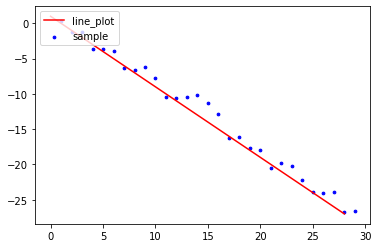

In [ ]:
plt.scatter(x, y, s=30, c='b', marker = '.', label='sample')
plt.plot(range(29),a*x+b, c='r', label='line_plot')
plt.legend(loc='upper left')
plt.show()

Logistic regression

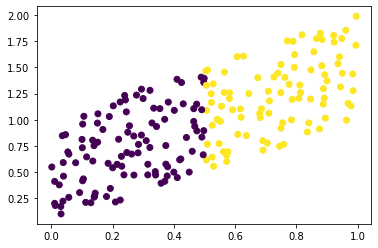

In [ ]:
classes=2
size = 200
labels = np.random.randint(0, classes, size)
x = (np.random.rand(size) + labels) / classes
y = x + np.random.rand(size)
x = x.reshape(size, 1)
y = y.reshape(size, 1)
labels = labels.reshape(size, 1)
x = np.hstack((x, y)).squeeze().T
y = labels.T
plt.scatter(x[0,:],x[1,:], c=y)

In [ ]:
def sigma(z):
  return 1./(1+np.exp(-z))

def pred(X,a,b):
  return sigma((a.T @ X) + b)

def costt(X,Y,y1):
  cost = -np.sum(Y*np.log(y1)+(1-Y)*np.log(1-y1))/X.shape[1]
  return cost.squeeze()

def new(y1,X,Y):
  a1 = (X @ (y1 - Y).T)/X.shape[1]
  b1 = np.sum(y1 - Y)/X.shape[1]
  return a1,b1

def grad(X, Y, a, b, learning_rate, num_epochs):
  k = []
  for i in range(num_epochs):
    y1 = pred(X,a,b)
    cost = costt(X,Y,y1)
    a1,b1 = new(y1,X,Y)
    a = a - learning_rate*a1
    b = b - learning_rate*b1
    k.append(cost)
  return k,a,b,

def result(X, Y, learning_rate = 0.04, num_epochs = 500):
  a, b = np.zeros((X.shape[0],1)),0
  K,A2,B2 = grad(X, Y, a, b, learning_rate, num_epochs)
  predict = pred(X,A2,B2)
  predict = (predict > 0.5).astype(int)
  return K,A2,B2,predict

def accuracy(preds, y2):
    return (len(preds) - sum(abs(preds - y2)))/len(preds)

def accuracy1(gt,pr):
    accuracy = (gt == pr).sum() / len(gt)
    return accuracy/100


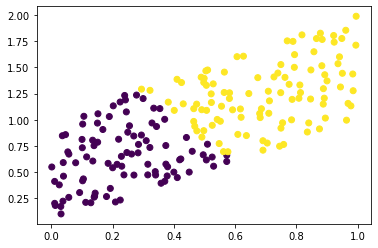

In [ ]:
K,A,B,Predict = result(x, y)
plt.scatter(x[0,:],x[1,:], c=Predict)

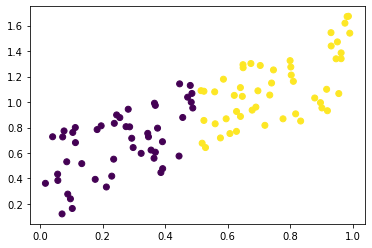

In [ ]:
classes=2
size = 100
labels = np.random.randint(0, classes, size)
x = (np.random.rand(size) + labels) / classes
y = x + np.random.rand(size) * 0.7
x = x.reshape(size, 1)
y = y.reshape(size, 1)
labels = labels.reshape(size, 1)
x = np.hstack((x, y)).squeeze().T
y = labels.T
plt.scatter(x[0,:],x[1,:], c=y)

In [ ]:
Prediction = pred(x,A,B)
Prediction = (Prediction > 0.5).astype(int)
print(accuracy1(y,Prediction))

0.92
